In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings('ignore')

os.chdir(r"C:\Notes\ds_project_portfolio\machine-predictive-maintenance-classification")

In [2]:
df= pd.read_csv(os.path.join('data','predictive_maintenance.csv'),index_col='UDI')

## Features
1. UID: unique identifier ranging from 1 to 10000
2. productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number
3. air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
4. process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
5. rotational speed [rpm]: calculated from powepower of 2860 W, overlaid with a normally distributed noise
6. torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.
7. tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a 'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.
8. Target : Failure or Not
9. Failure Type : Type of Failure

In [3]:
df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
UDI,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
df.shape

(10000, 9)

In [5]:
df.duplicated().sum()

0

In [6]:
df.nunique()

Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [7]:
df.drop('Product ID', axis=1, inplace=True)

In [8]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

In [9]:
NUM_FEATURES=['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
CAT_FEATURES=['Type']
TARGET=['Target','Failure Type']

In [10]:
df[NUM_FEATURES].describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


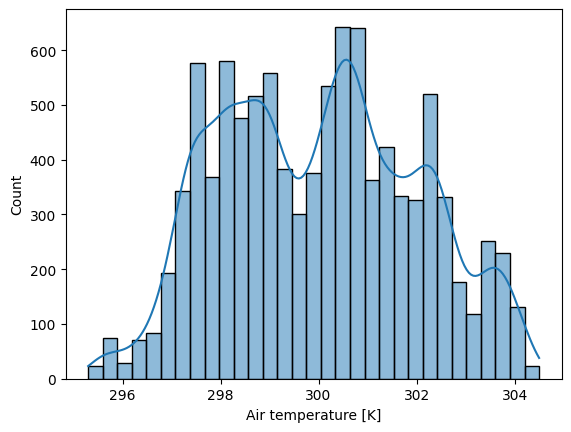

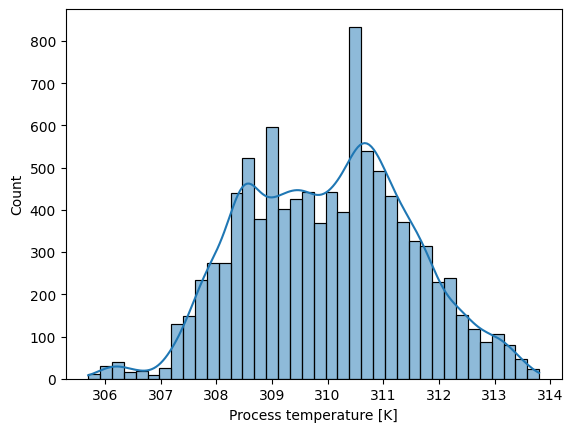

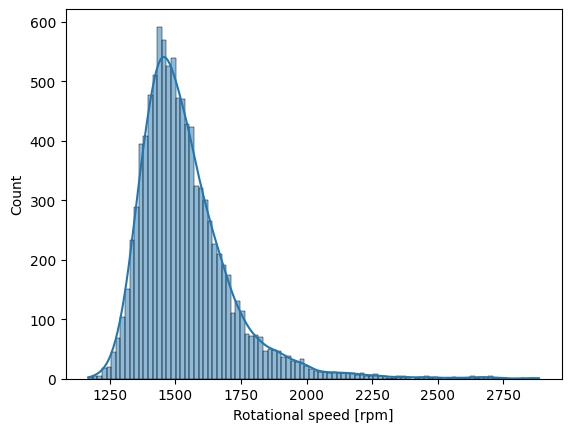

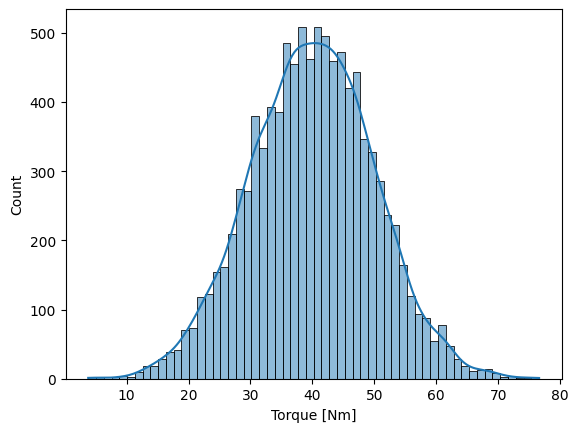

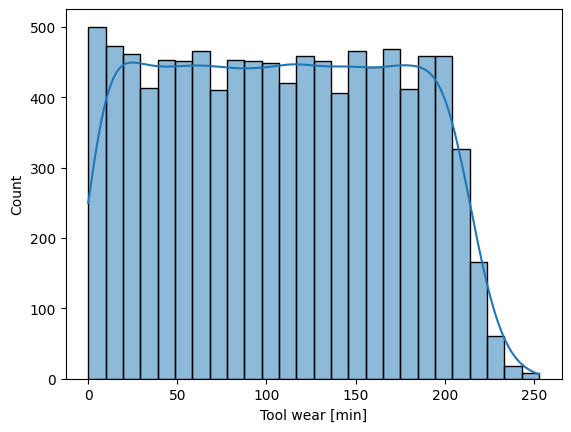

In [11]:
for i in NUM_FEATURES:
    sns.histplot(data=df,x=i,kde=True)
    plt.show()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'No Failure'),
  Text(1, 0, 'Power Failure'),
  Text(2, 0, 'Tool Wear Failure'),
  Text(3, 0, 'Overstrain Failure'),
  Text(4, 0, 'Random Failures'),
  Text(5, 0, 'Heat Dissipation Failure')])

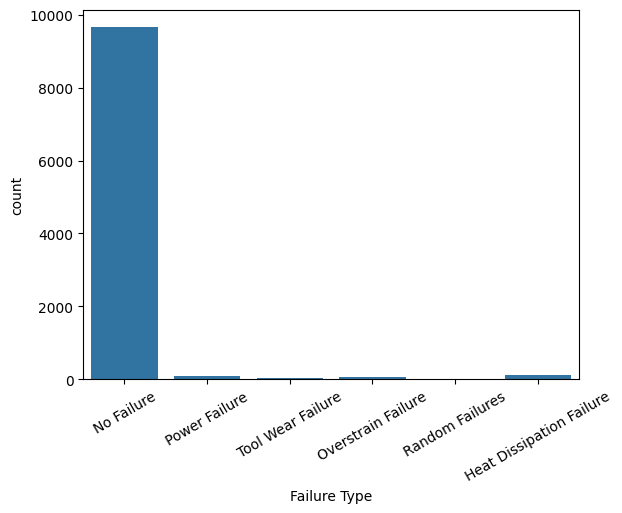

In [12]:
sns.countplot(data=df,x=TARGET[1])
plt.xticks(rotation=30)

<Axes: xlabel='Target', ylabel='count'>

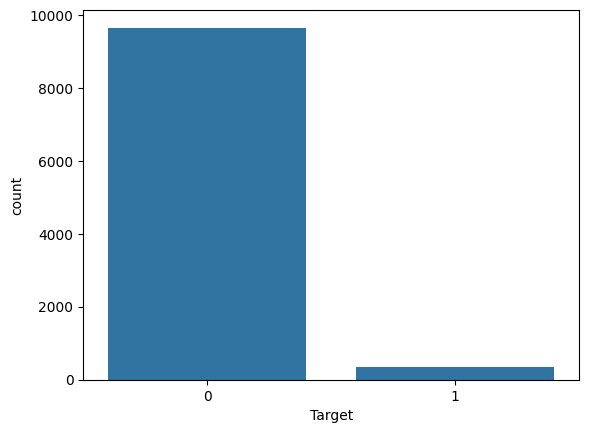

In [13]:
sns.countplot(data=df,x=TARGET[0])

- We're dealing with a very unbalanced dataset.

<Figure size 1000x500 with 0 Axes>

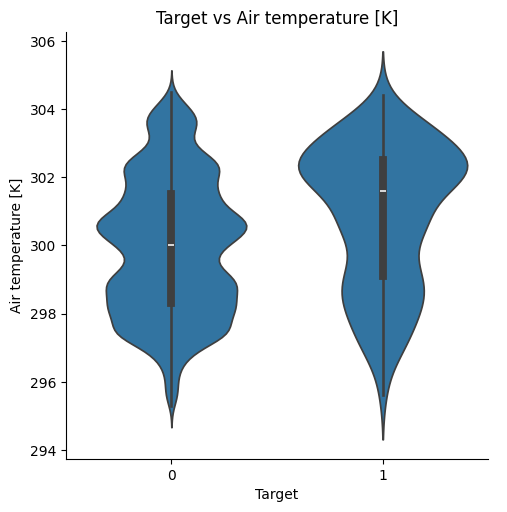

<Figure size 1000x500 with 0 Axes>

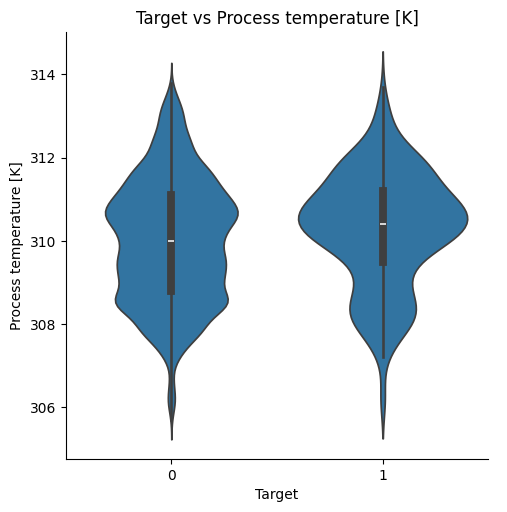

<Figure size 1000x500 with 0 Axes>

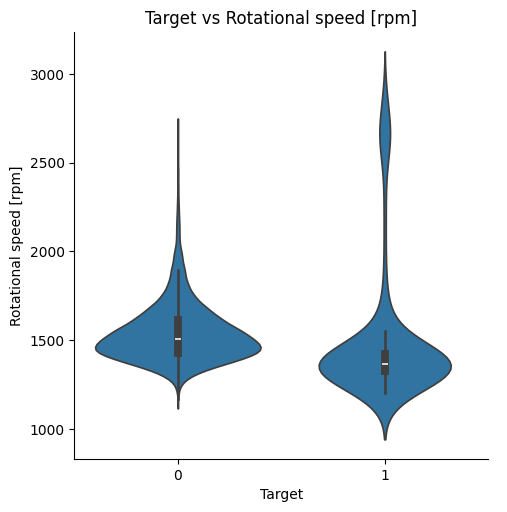

<Figure size 1000x500 with 0 Axes>

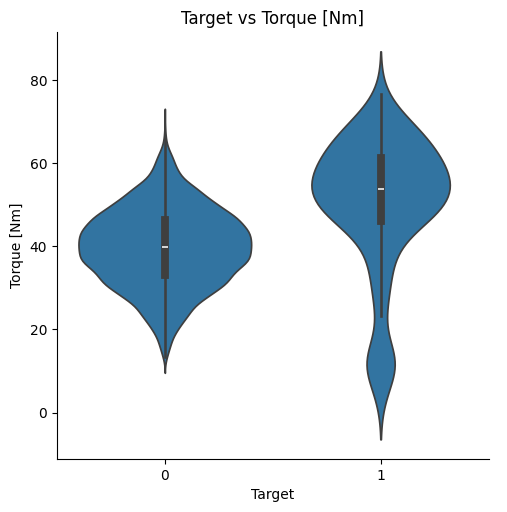

<Figure size 1000x500 with 0 Axes>

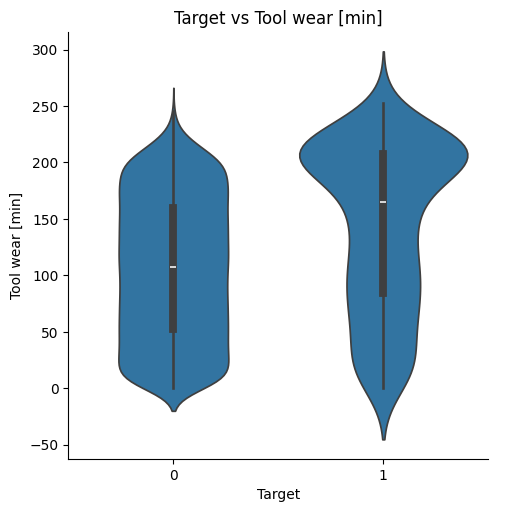

In [14]:
for i in NUM_FEATURES:
  plt.figure(figsize=(10,5))
  sns.catplot(x=TARGET[0],y=i,data=df,kind='violin')
  plt.ylabel(i)
  plt.xlabel(TARGET[0])
  plt.title(TARGET[0]+' vs '+i)
  plt.show()

- Temperature is a good indicator of machine failure. Higher temperatures results in greater chance of failure.
- Higher/lower the average of the rotational speed, higher the chance of failure. Same with torque and tool wear.

<Figure size 1000x500 with 0 Axes>

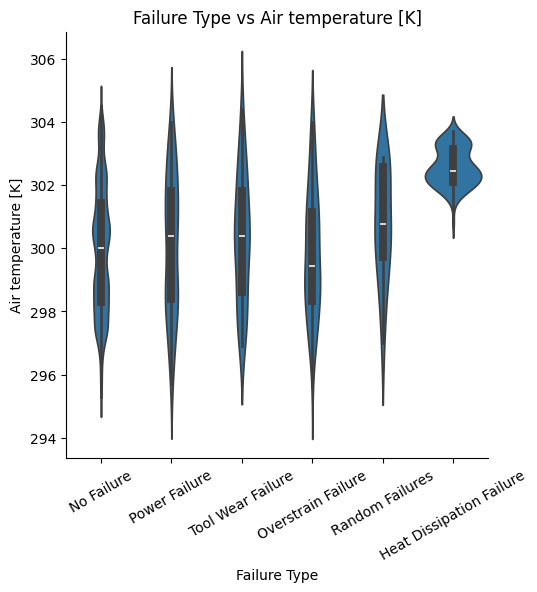

<Figure size 1000x500 with 0 Axes>

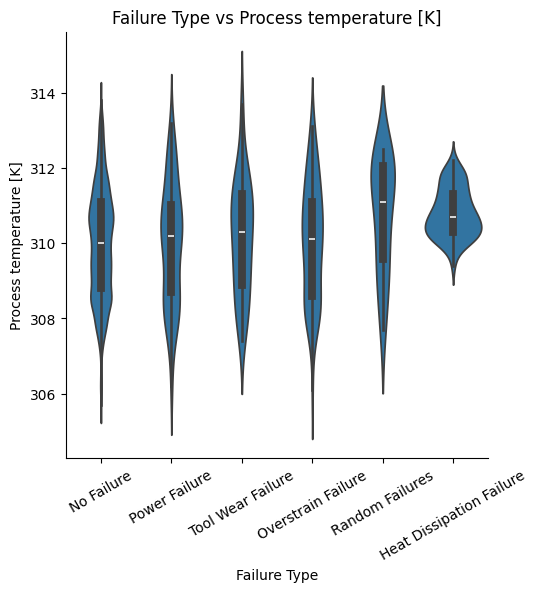

<Figure size 1000x500 with 0 Axes>

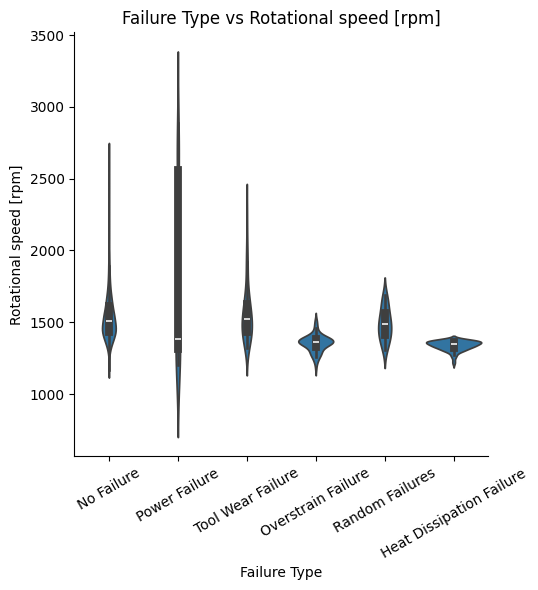

<Figure size 1000x500 with 0 Axes>

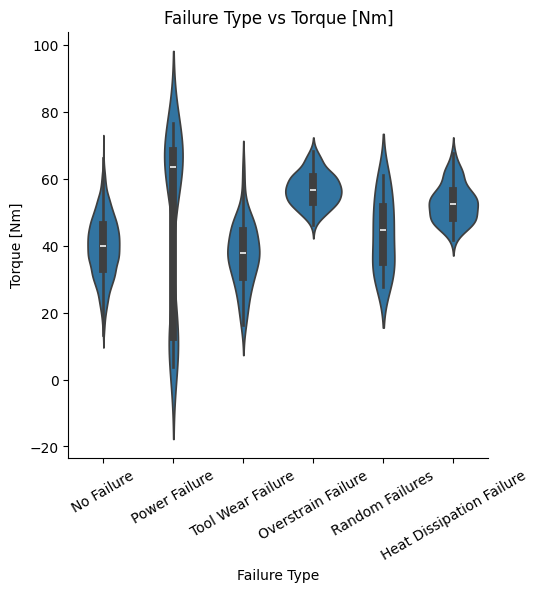

<Figure size 1000x500 with 0 Axes>

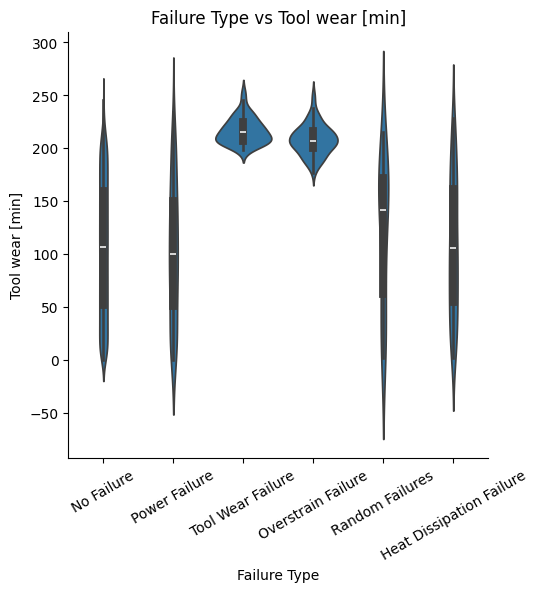

In [15]:
for i in NUM_FEATURES:
  plt.figure(figsize=(10,5))
  sns.catplot(x=TARGET[1],y=i,data=df,kind='violin')
  plt.ylabel(i)
  plt.xlabel(TARGET[1])
  plt.title(TARGET[1]+' vs '+i)
  plt.xticks(rotation=30)
  plt.show()

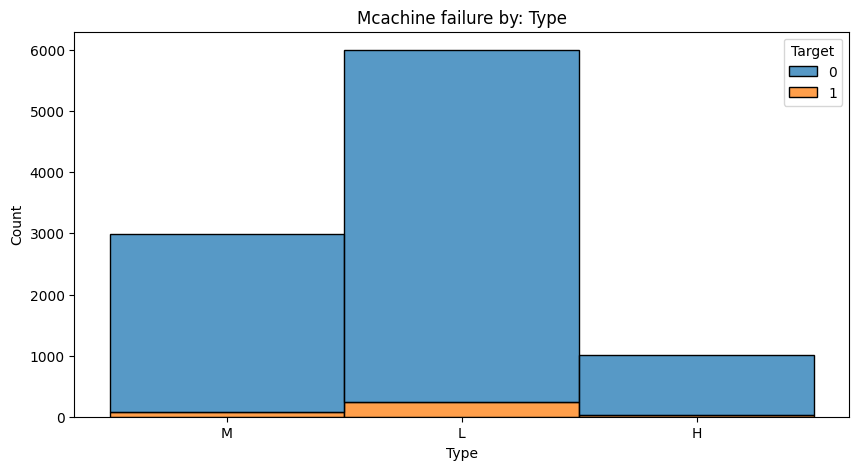

In [16]:
for i in CAT_FEATURES:
  plt.figure(figsize=(10,5))
  sns.histplot(x=i, hue=TARGET[0], data=df, stat="count", multiple="stack")
  plt.title('Mcachine failure by: '+i)
  plt.show()

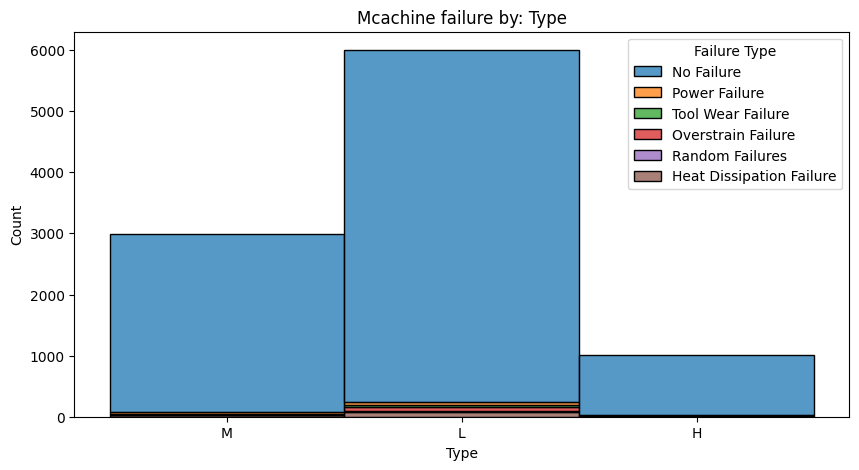

In [17]:
for i in CAT_FEATURES:
  plt.figure(figsize=(10,5))
  sns.histplot(x=i, hue=TARGET[1], data=df, stat="count", multiple="stack")
  plt.title('Mcachine failure by: '+i)
  plt.show()

<Figure size 1000x500 with 0 Axes>

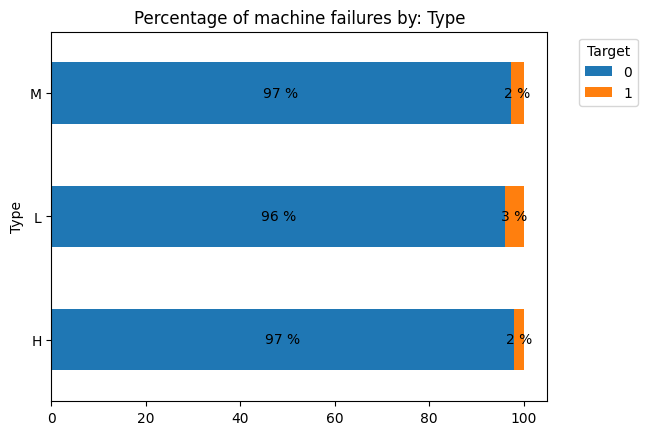

In [18]:
for i in CAT_FEATURES:
    x_var, y_var = i, TARGET[0]
    plt.figure(figsize=(10,5))
    df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    df_grouped.plot.barh(stacked=True)
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("Percentage of machine failures by: "+i)
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()

<Figure size 1000x500 with 0 Axes>

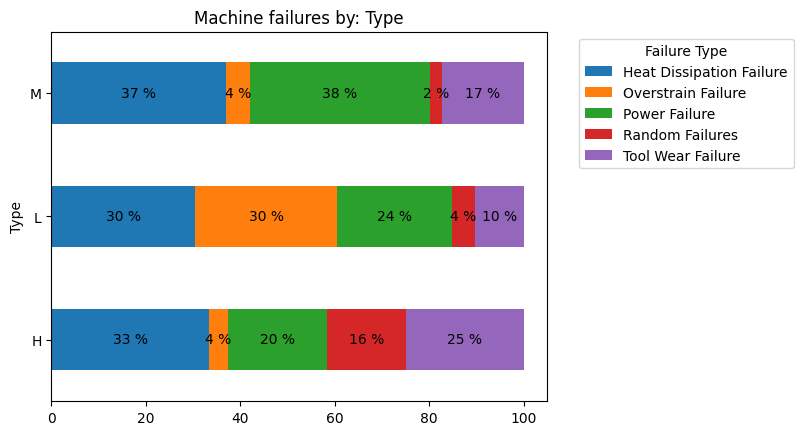

In [19]:
for i in CAT_FEATURES:
    x_var, y_var = i, TARGET[1]
    plt.figure(figsize=(10,5))
    df_grouped = df[df['Failure Type']!='No Failure'].groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    df_grouped.plot.barh(stacked=True)
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("Machine failures by: "+i)
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()

<Axes: title={'center': 'Correlation Analysis'}>

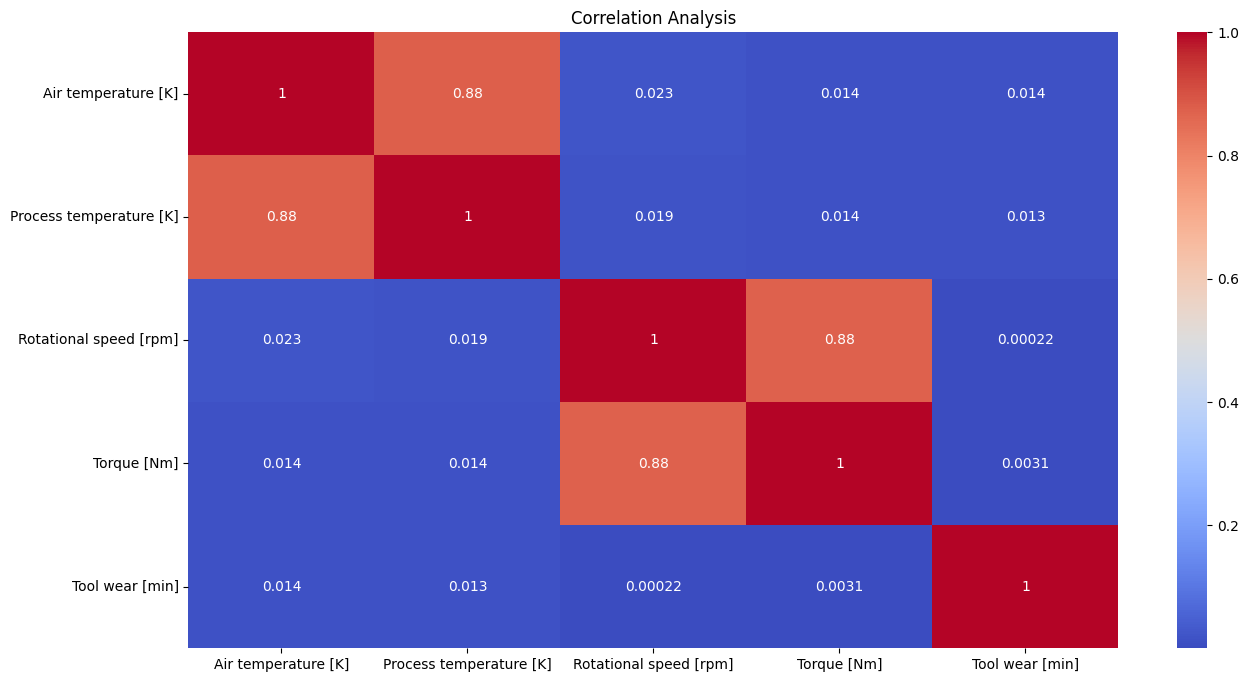

In [20]:
plt.figure(figsize=(15,8))
plt.title('Correlation Analysis')
correlation = df[NUM_FEATURES].corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [21]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
UDI,,,,,,,,
1,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L,298.2,308.7,1408,46.3,3,0,No Failure
3,L,298.1,308.5,1498,49.4,5,0,No Failure
4,L,298.2,308.6,1433,39.5,7,0,No Failure
5,L,298.2,308.7,1408,40.0,9,0,No Failure


In [22]:
X=df[CAT_FEATURES+NUM_FEATURES]
y=df[TARGET]

In [23]:
X_train,X_val,y_train,y_val=train_test_split(X
                                               , y
                                               , test_size=0.2
                                               , stratify=y
                                               , shuffle=True
                                               , random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X_train
                                               , y_train
                                               , test_size=0.2
                                               , stratify=y_train
                                               , shuffle=True
                                               , random_state=42)

In [24]:
X_train.shape, X_val.shape, X_test.shape

((6400, 6), (2000, 6), (1600, 6))

In [25]:
y_train.shape, y_val.shape, y_test.shape

((6400, 2), (2000, 2), (1600, 2))

In [26]:
for i in [y_train, y_val, y_test]:
    # print(str(i))
    print(i['Failure Type'].value_counts(normalize=True)*100)

Failure Type
No Failure                  96.515625
Heat Dissipation Failure     1.125000
Power Failure                0.953125
Overstrain Failure           0.781250
Tool Wear Failure            0.453125
Random Failures              0.171875
Name: proportion, dtype: float64
Failure Type
No Failure                  96.50
Heat Dissipation Failure     1.10
Power Failure                0.95
Overstrain Failure           0.80
Tool Wear Failure            0.45
Random Failures              0.20
Name: proportion, dtype: float64
Failure Type
No Failure                  96.5625
Heat Dissipation Failure     1.1250
Power Failure                0.9375
Overstrain Failure           0.7500
Tool Wear Failure            0.4375
Random Failures              0.1875
Name: proportion, dtype: float64


In [27]:
numeric_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer()),
        ("scaler",StandardScaler())
    ]
)
categorical_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("onehotencoder",OneHotEncoder(sparse_output=False,drop='if_binary'))
    ]
)
preprocessor=ColumnTransformer(

    [
        ("numeric_pipeline",numeric_pipeline,NUM_FEATURES),
        ("catategorical_pipeline",categorical_pipeline,CAT_FEATURES),
    ]
)

In [28]:
preprocessor

ColumnTransformer(transformers=[('numeric_pipeline',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]']),
                                ('catategorical_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False))]),
                                 ['Type'])])

In [29]:
X_train1=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_val1=pd.DataFrame(preprocessor.transform(X_val),columns=preprocessor.get_feature_names_out())
X_test1=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [30]:
X_train1.head()

,numeric_pipeline__Air temperature [K],numeric_pipeline__Process temperature [K],numeric_pipeline__Rotational speed [rpm],numeric_pipeline__Torque [Nm],numeric_pipeline__Tool wear [min],catategorical_pipeline__Type_H,catategorical_pipeline__Type_L,catategorical_pipeline__Type_M
0,-1.249912,-0.611959,0.389732,-0.969264,1.626688,0.0,1.0,0.0
1,-1.000343,-1.625714,-0.443120,0.441017,0.869027,0.0,0.0,1.0
2,0.696726,0.334212,0.126726,-0.005903,-0.393742,0.0,0.0,1.0
3,0.147675,1.145215,0.060974,-0.353508,-0.377958,0.0,0.0,1.0
4,-1.399653,-1.422963,0.006181,-0.423029,0.963734,0.0,0.0,1.0


## Model training

In [31]:
import keras
import tensorflow as tf
from tensorflow.keras import Model, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


In [32]:
inp_dim=X_train1.shape[1]
inp_dim

8

In [33]:
i=Input(shape=(inp_dim,))

x=Dense(2**10, activation='relu')(i)
x=BatchNormalization()(x)
x=Dropout(0.5)(x)

x=Dense(2**9, activation='relu')(x)
x=BatchNormalization()(x)
x=Dropout(0.5)(x)

x=Dense(2**8, activation='relu')(x)
x=BatchNormalization()(x)
x=Dropout(0.5)(x)

x=Dense(2**7, activation='relu')(x)
x=BatchNormalization()(x)
x=Dropout(0.5)(x)

x=Dense(2**6, activation='relu')(x)
x=BatchNormalization()(x)
x=Dropout(0.5)(x)

x=Dense(2**5, activation='relu')(x)
x=BatchNormalization()(x)
x=Dropout(0.5)(x)

x=Dense(2**4, activation='relu')(x)
x=BatchNormalization()(x)
x=Dropout(0.5)(x)

x=Dense(2**3, activation='relu')(x)
x=BatchNormalization()(x)
x=Dropout(0.5)(x)

failure_prob=Dense(1, activation='sigmoid', name='failure_prob')(x)
failure_type=Dense(6, activation='softmax', name='failure_type')(x)

model=Model(inputs=i,outputs=[failure_prob, failure_type])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1024)      │      9,216 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 1024)      │      4,096 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 1024)      │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 512)       │    524,800 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 512)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │    131,328 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_2[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │     32,896 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_3[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │      8,256 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_4[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 32)        │      2,080 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_5[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 32)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 16)        │        528 │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16)        │         64 │ dense_6[0][0]     │
│ (BatchNormalizatio… │                   │            │                 

 Total params: 717,463 (2.74 MB)

 Trainable params: 713,383 (2.72 MB)

 Non-trainable params: 4,080 (15.94 KB)

In [34]:
lr=0.0001
opt=Adam(learning_rate=lr)
model.compile(optimizer=opt,
              loss={'failure_prob': 'binary_crossentropy', 'failure_type': 'categorical_crossentropy'},
              metrics={'failure_prob': ['recall','precision','AUC'], 'failure_type': ['recall','precision','AUC']}
              )
es=EarlyStopping(monitor='val_loss',
                 patience=20,
                 min_delta=1e-9,
                 mode='min',
                 start_from_epoch=200,
                 verbose=1,
                 restore_best_weights=False)

In [35]:
ohe=OneHotEncoder(sparse_output=False)

y_train_enc = pd.DataFrame(ohe.fit_transform(y_train[['Failure Type']]), columns=ohe.get_feature_names_out())
y_val_enc = pd.DataFrame(ohe.transform(y_val[['Failure Type']]), columns=ohe.get_feature_names_out())
y_test_enc = pd.DataFrame(ohe.transform(y_test[['Failure Type']]), columns=ohe.get_feature_names_out())

In [36]:
history = model.fit(X_train1,
                    {'failure_prob': y_train['Target'],
                     'failure_type': y_train_enc},
                    validation_data=(X_val1,
                    {'failure_prob': y_val['Target'],
                     'failure_type': y_val_enc}),
                    epochs=1000,
                    batch_size=32,
                    # validation_split=0.2,
                    callbacks=[es])

Epoch 1/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - failure_prob_AUC: 0.5079 - failure_prob_precision: 0.0343 - failure_prob_recall: 0.5022 - failure_type_AUC: 0.4433 - failure_type_precision: 0.0599 - failure_type_recall: 0.0169 - loss: 3.3516 - val_failure_prob_AUC: 0.4937 - val_failure_prob_precision: 0.0312 - val_failure_prob_recall: 0.4265 - val_failure_type_AUC: 0.1047 - val_failure_type_precision: 0.0000e+00 - val_failure_type_recall: 0.0000e+00 - val_loss: 2.8243
Epoch 2/1000
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - failure_prob_AUC: 0.4818 - failure_prob_precision: 0.0382 - failure_prob_recall: 0.4851 - failure_type_AUC: 0.4602 - failure_type_precision: 0.0751 - failure_type_recall: 0.0184 - loss: 3.1959 - val_failure_prob_AUC: 0.4259 - val_failure_prob_precision: 0.0330 - val_failure_prob_recall: 0.2206 - val_failure_type_AUC: 0.1705 - val_failure_type_precision: 0.0000e+00 - val_failure_type_recall: 0.0000e+00 - val_loss: 2.8163
Epoch 3/1000
200/200 ━━━━━━━━━━━━━━━━━━

In [37]:
def show_plot(metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_{}'.format(metric)])
    plt.title(metric.upper())
    plt.xlabel('epocs')
    plt.legend(['train','validation'], loc='upper right')
    plt.show()

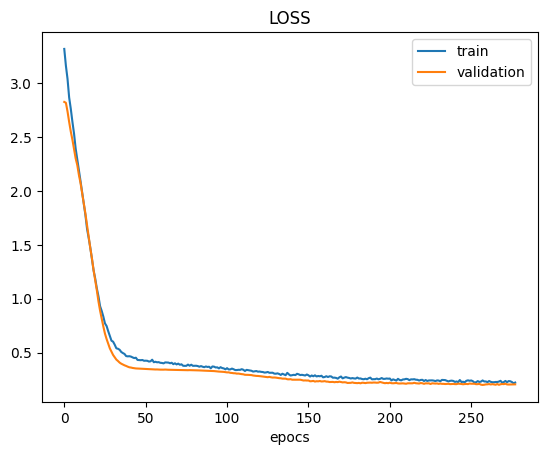

In [38]:
show_plot('loss')

In [41]:
from sklearn.metrics import (
    roc_auc_score, recall_score, precision_score, f1_score,
    top_k_accuracy_score, cohen_kappa_score, matthews_corrcoef
)

In [42]:
def evaluate_model(true, pred, true_enc):
    ## failure probability
    roc_auc = roc_auc_score(true['Target'].values, pred[0])
    recall = recall_score(true['Target'].values, np.round_(pred[0]))
    precision = precision_score(true['Target'].values, np.round_(pred[0]))
    f1 = f1_score(true['Target'].values, np.round_(pred[0]))

    ## failute type
    top2_acc = top_k_accuracy_score(true['Failure Type'].values, pred[1], k=2)
    top3_acc = top_k_accuracy_score(true['Failure Type'].values, pred[1], k=3)
    ck_score = cohen_kappa_score(np.argmax(true_enc,axis=1), pd.DataFrame(pred[1]).idxmax(axis=1))
    mcc = matthews_corrcoef(np.argmax(true_enc,axis=1), pd.DataFrame(pred[1]).idxmax(axis=1))
    
    return {
        'failure_prob':{
            'roc_auc':roc_auc,
            'recall':recall,
            'precision':precision,
            'f1_score':f1
        },
        'failure_type':{
            'top2_accuracy':top2_acc,
            'top3_accuracy':top3_acc,
            'Cohen-Kappa_score':ck_score,
            'MCC_score':mcc 
        }
    }

In [43]:
train_performance = evaluate_model(y_train, model.predict(X_train1), y_train_enc)
val_performance = evaluate_model(y_val, model.predict(X_val1), y_val_enc)
test_performance = evaluate_model(y_test, model.predict(X_test1), y_test_enc)

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [44]:
train_performance

{'failure_prob': {'roc_auc': 0.9854894235792955,
  'recall': 0.17511520737327188,
  'precision': 0.95,
  'f1_score': 0.29571984435797666},
 'failure_type': {'top2_accuracy': 0.9809375,
  'top3_accuracy': 0.9875,
  'Cohen-Kappa_score': 0.11517242287384633,
  'MCC_score': 0.2392030400326412}}

In [45]:
val_performance

{'failure_prob': {'roc_auc': 0.9523428936792108,
  'recall': 0.11764705882352941,
  'precision': 1.0,
  'f1_score': 0.21052631578947367},
 'failure_type': {'top2_accuracy': 0.983,
  'top3_accuracy': 0.9885,
  'Cohen-Kappa_score': 0.13075457189662665,
  'MCC_score': 0.26453842806436345}}

In [46]:
test_performance

{'failure_prob': {'roc_auc': 0.9522663025250349,
  'recall': 0.2222222222222222,
  'precision': 0.8571428571428571,
  'f1_score': 0.35294117647058826},
 'failure_type': {'top2_accuracy': 0.985,
  'top3_accuracy': 0.98875,
  'Cohen-Kappa_score': 0.09902252443688897,
  'MCC_score': 0.19875022980268356}}